### RLab05 - Martina Cacciola (2097476)

# Exercise 1

In [22]:
library(rvest)
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)

ERROR: Error in library(emdbook): non c'è alcun pacchetto chiamato 'emdbook'


### a)

Corps 1:
Posterior mean: 0.615 
Posterior median: 0.6133613 
Posterior variance: 0.003075 
95% credibility interval: 0.025 0.975 

Corps 2:
Posterior mean: 0.7035714 
Posterior median: 0.7023702 
Posterior variance: 0.002512749 
95% credibility interval: 0.025 0.975 



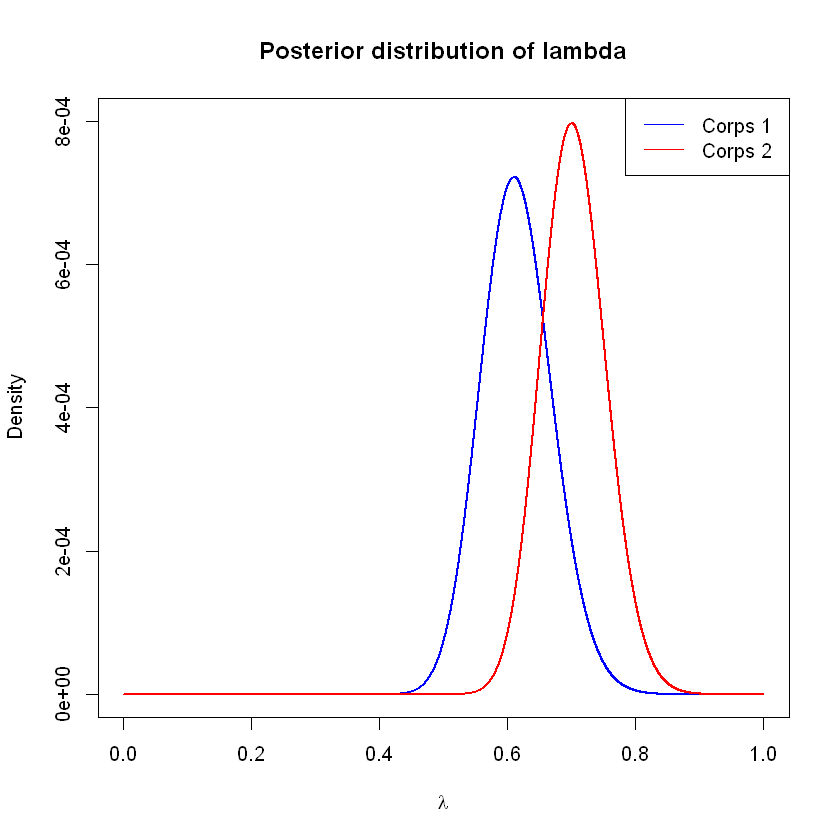

In [32]:
# Data
y <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

# Uniform Prior
lambda <- seq(0, 1, length.out = 10000)
prior <- rep(1/length(lambda), length(lambda))

# Likelihood
likelihood1 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n1))
likelihood2 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n2))

# Posterior
posterior1 <- likelihood1 * prior
posterior1 <- posterior1 / sum(posterior1)
posterior2 <- likelihood2 * prior
posterior2 <- posterior2 / sum(posterior2)

# Plot posterior
plot(lambda, posterior1, type = "l", col = "blue", lwd = 2,
     xlab = expression(lambda), ylab = "Density",
     main = "Posterior distribution of lambda", ylim = c(0, 8*10^-4))
lines(lambda, posterior2, col = "red", lwd = 2)
legend("topright", legend = c("Corps 1", "Corps 2"),
       col = c("blue", "red"), lty = 1)

# Posterior mean
mean1 <- sum(lambda * posterior1)
mean2 <- sum(lambda * posterior2)

# Posterior median
cum_posterior1 <- cumsum(posterior1)
median1 <- lambda[which.max(cum_posterior1 >= 0.5)]
cum_posterior2 <- cumsum(posterior2)
median2 <- lambda[which.max(cum_posterior2 >= 0.5)]

# Posterior variance
variance1 <- sum((lambda - mean1)^2 * posterior1)
variance2 <- sum((lambda - mean2)^2 * posterior2)

# Credibility interval
ci1 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior1)
ci2 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior2)

cat("Observation 1:\n")
cat("Posterior mean:", mean1,"\n")
cat("Posterior median:", median1,"\n")
cat("Posterior variance:", variance1,"\n")
cat("95% credibility interval:", ci1,"\n\n")

cat("Observation 2:\n")
cat("Posterior mean:", mean2,"\n")
cat("Posterior median:", median2,"\n")
cat("Posterior variance:", variance2,"\n")
cat("95% credibility interval:", ci2,"\n\n")

### b)

Corps 1:
Posterior mean: 0.6125 
Posterior median: 0.6108611 
Posterior variance: 0.0030625 
95% credibility interval: 0.025 0.975 

Corps 2:
Posterior mean: 0.7017857 
Posterior median: 0.7005701 
Posterior variance: 0.002506372 
95% credibility interval: 0.025 0.975 



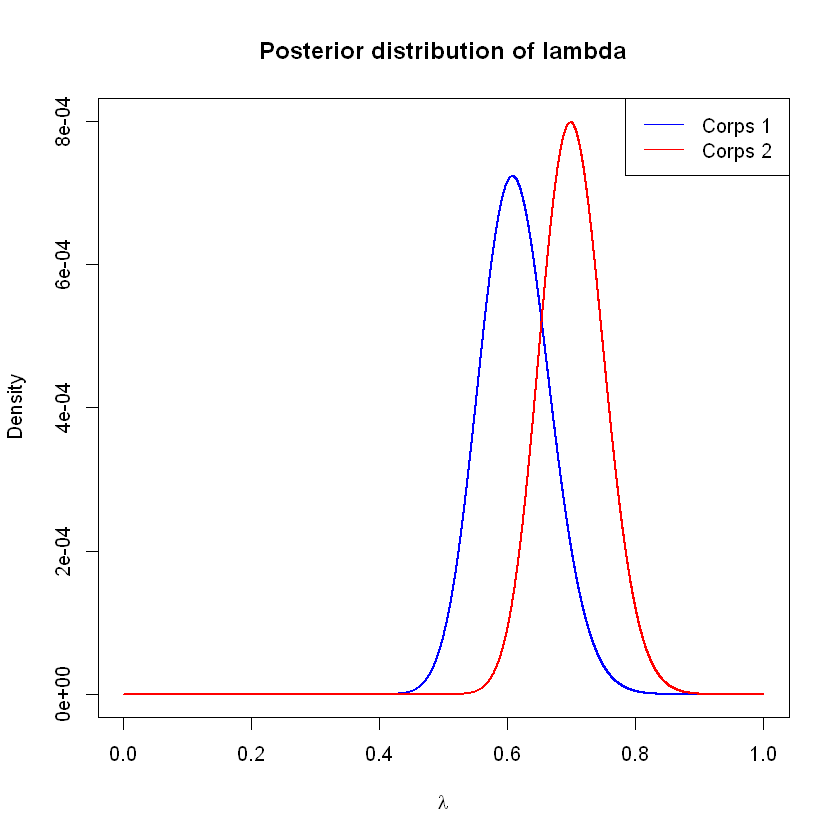

In [34]:
# Data
y <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

# Jeffreys' Prior
lambda <- seq(0, 1, length.out = 10000)
prior <- 1/sqrt(lambda)
prior[is.infinite(prior)] <- 0  # Set infinite values to zero
prior <- prior / sum(prior)  # Normalize the prior probabilities

# Likelihood
likelihood1 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n1))
likelihood2 <- sapply(lambda, function(l) prod(dpois(y, l) ^ n2))

# Posterior
posterior1 <- likelihood1 * prior
posterior1 <- posterior1 / sum(posterior1)
posterior2 <- likelihood2 * prior
posterior2 <- posterior2 / sum(posterior2)

# Plot posterior
plot(lambda, posterior1, type = "l", col = "blue", lwd = 2,
     xlab = expression(lambda), ylab = "Density",
     main = "Posterior distribution of lambda", ylim = c(0, 8*10^-4))
lines(lambda, posterior2, col = "red", lwd = 2)
legend("topright", legend = c("Corps 1", "Corps 2"),
       col = c("blue", "red"), lty = 1)

# Posterior mean
mean1 <- sum(lambda * posterior1)
mean2 <- sum(lambda * posterior2)

# Posterior median
cum_posterior1 <- cumsum(posterior1)
median1 <- lambda[which.max(cum_posterior1 >= 0.5)]
cum_posterior2 <- cumsum(posterior2)
median2 <- lambda[which.max(cum_posterior2 >= 0.5)]

# Posterior variance
variance1 <- sum((lambda - mean1)^2 * posterior1)
variance2 <- sum((lambda - mean2)^2 * posterior2)

# Credibility interval
ci1 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior1)
ci2 <- quantile(lambda, probs = c(0.025, 0.975), weights = posterior2)

cat("Observation 1:\n")
cat("Posterior mean:", mean1,"\n")
cat("Posterior median:", median1,"\n")
cat("Posterior variance:", variance1,"\n")
cat("95% credibility interval:", ci1,"\n\n")

cat("Observation 2:\n")
cat("Posterior mean:", mean2,"\n")
cat("Posterior median:", median2,"\n")
cat("Posterior variance:", variance2,"\n")
cat("95% credibility interval:", ci2,"\n\n")

# Exercise 2

In [37]:
install.packages("coda")

package 'coda' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpEvJqWX\downloaded_packages


### b)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

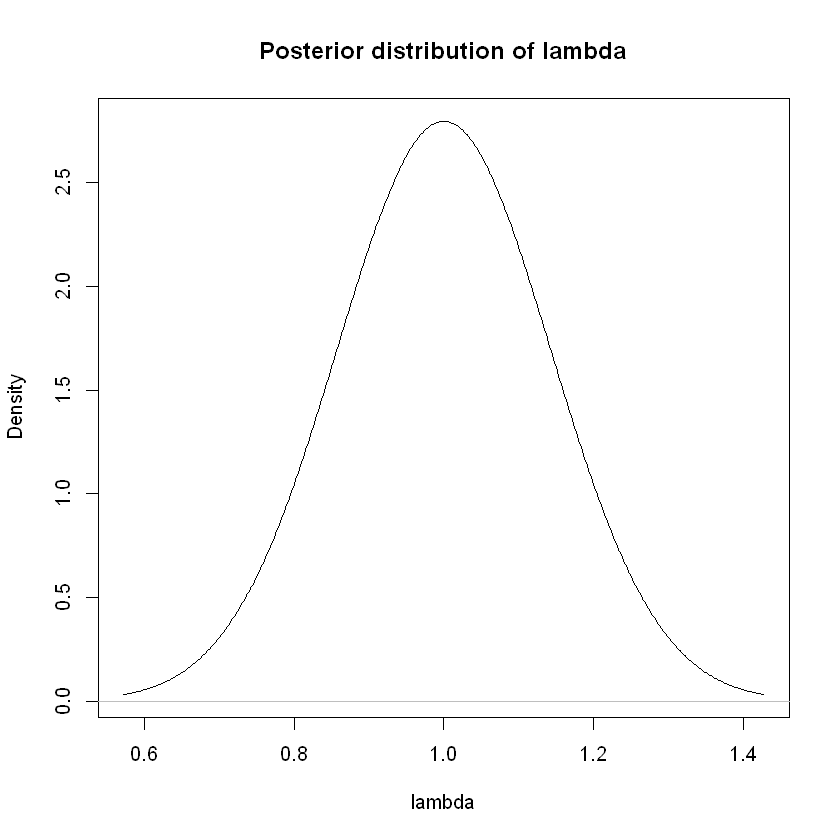

In [54]:
# Define the data
y <- c(109, 65, 22, 3, 1, 0, 144, 91, 32, 11, 2, 0)
deaths <- c(0:4, Inf)

# Define the log-likelihood function
log_lik <- function(lambda) {
    p <- diff(c(0, ppois(deaths, lambda), 1))
    sum(dpois(y, lambda * p, log = TRUE))
}

# Define the log-prior function
log_prior <- function(lambda) {
    dgamma(lambda, 0.001, 0.001, log = TRUE)
}

# Define the log-posterior function
log_posterior <- function(lambda) {
    log_lik(lambda) + log_prior(lambda)
}

# Set initial values and tuning parameter
lambda <- 1
sigma <- 1

# Set number of iterations and burn-in
n_iter <- 11000
burn_in <- 1000

# Initialize vector to store samples
samples <- numeric(n_iter)

# Run Metropolis algorithm
for (i in seq_len(n_iter)) {
    # Propose new value for lambda
    lambda_star <- rnorm(1, lambda, sigma)
    
    # Check if proposed value is positive and log-likelihood is finite
    if (lambda_star > 0 && is.finite(log_lik(lambda_star))) {
        # Compute acceptance probability
        alpha <- exp(log_posterior(lambda_star) - log_posterior(lambda))
        
        # Accept or reject proposal
        if (runif(1) < alpha) {
            lambda <- lambda_star
        }
    }
    
    # Store sample
    samples[i] <- lambda
}

# Discard burn-in samples
samples <- samples[-seq_len(burn_in)]

# Plot the posterior distribution of lambda
plot(density(samples), main = "Posterior distribution of lambda", xlab = "lambda")

# Compute summary statistics
summary(samples)

In [49]:
library(coda)

# Data
y <- c(0, 1, 2, 3, 4)
n1 <- c(109, 65, 22, 3, 1)
n2 <- c(144, 91, 32, 11, 2)

# Function to compute log-likelihood
log_likelihood <- function(lambda, y, n) {
  sum(dpois(y, lambda * n, log = TRUE))
}

# Function to compute log-prior (Jeffreys' prior)
log_prior <- function(lambda) {
  if (lambda <= 0) {
    return(-Inf)
  }
  return(-0.5 * log(lambda))
}

# Function to compute log-likelihood
log_likelihood <- function(lambda, y, n) {
  sum(dpois(y, lambda * n, log = TRUE))
}

# Function to compute log-prior (Jeffreys' prior)
log_prior <- function(lambda) {
  if (lambda <= 0) {
    return(-Inf)
  }
  return(-0.5 * log(lambda))
}

# Function to compute log-posterior
log_posterior <- function(lambda, y, n) {
  log_likelihood(lambda, y, n=n) + log_prior(lambda)
}

# Markov Chain Monte Carlo (MCMC) function
mcmc <- function(y, n = n1, num_iter = 50000, num_burnin = 10000, thinning = 10) {
  # Initialize variables
  num_samples <- (num_iter - num_burnin) / thinning
  lambda_samples <- numeric(num_samples)
  accept <- 0
  lambda_current <- 0.1  # Initial value
  
  # Run MCMC
  for (i in 1:num_iter) {
    # Sample proposal from log-normal distribution
    lambda_proposal <- exp(rnorm(1, mean = log(lambda_current), sd = 0.5))
    
    # Compute log-posterior for current and proposed values
    log_posterior_current <- log_posterior(lambda_current, y, n = n)
    log_posterior_proposal <- log_posterior(lambda_proposal, y, n = n)
    
    # Calculate acceptance ratio
    acceptance_ratio <- exp(log_posterior_proposal - log_posterior_current)
    
    # Accept or reject the proposal
    if (runif(1) < acceptance_ratio) {
      lambda_current <- lambda_proposal
      accept <- accept + 1
    }
    
    # Save sample after burn-in period and with thinning
    if (i > num_burnin && i %% thinning == 0) {
      lambda_samples[(i - num_burnin) / thinning] <- lambda_current
    }
  }
  
  # Acceptance rate
  acceptance_rate <- accept / num_iter
  
  # Return MCMC samples and acceptance rate
  list(lambda_samples = lambda_samples, acceptance_rate = acceptance_rate)
}

# MCMC parameters
num_iter <- 50000  # Total number of iterations
num_burnin <- 10000  # Number of burn-in iterations
thinning <- 10  # Thinning factor

# Run MCMC for Corps 1
mcmc_results1 <- mcmc(y = y, n = n1, num_iter = num_iter, num_burnin = num_burnin, thinning = thinning)
lambda_samples1 <- mcmc_results1$lambda_samples

# Run MCMC for Corps 2
mcmc_results2 <- mcmc(y = y, n = n2, num_iter = num_iter, num_burnin = num_burnin, thinning = thinning)
lambda_samples2 <- mcmc_results2$lambda_samples

# Combine lambda samples from both corps
lambda_samples_combined <- c(lambda_samples1, lambda_samples2)

# Create coda MCMC object
mcmc_object <- mcmc(lambda_samples_combined)

# Summary statistics
posterior_mean <- mean(mcmc_object)
posterior_median <- median(mcmc_object)
posterior_variance <- var(mcmc_object)
credibility_interval <- quantile(mcmc_object, probs = c(0.025, 0.975))

# Print results
cat("Corps 1:\n")
cat("Posterior mean:", posterior_mean, "\n")
cat("Posterior median:", posterior_median, "\n")
cat("Posterior variance:", posterior_variance, "\n")
cat("95% credibility interval:", credibility_interval, "\n\n")

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064947"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065458"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029015"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052141"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023442"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040361"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068621"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063544"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050499"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048347"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044313"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042210"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048813"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071602"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057967"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063879"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.077399"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.079004"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048434"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072053"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.094457"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055978"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054791"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051356"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032394"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022451"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029172"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060100"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049009"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049261"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043303"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.083923"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048077"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058032"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029938"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046269"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023358"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030007"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053410"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030154"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025588"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058828"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036385"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030068"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065205"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048689"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050739"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045780"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051133"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032820"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046728"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028934"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056376"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056689"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062966"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.073859"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045687"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033401"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062840"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049784"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.073472"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047706"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028109"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.086697"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032609"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061023"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055143"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055318"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032847"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027325"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057300"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053677"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051451"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047422"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030887"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051825"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052428"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036891"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044427"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059681"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024777"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047797"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058043"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043403"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042348"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040796"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042311"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045771"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048633"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032436"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043750"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056343"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.100775"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030931"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051310"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.074667"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035002"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034873"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060078"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040880"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035594"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072246"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039848"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.076865"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059076"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029399"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036896"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032663"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.067274"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031893"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.088432"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045390"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054543"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041809"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051515"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032179"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056469"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044722"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035110"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060250"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045390"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061003"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.082225"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050154"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064004"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051444"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069385"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021429"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048239"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033443"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029250"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036538"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062681"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036680"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041641"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050391"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040920"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061364"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049348"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072839"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039128"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060163"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055368"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035281"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025268"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019259"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048793"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042561"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026873"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059833"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050185"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054363"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044414"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059693"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063583"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.066216"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053469"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042181"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030914"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030986"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046271"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035951"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037529"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.088016"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035075"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048295"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041409"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045044"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045437"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038209"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060421"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029028"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048901"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058973"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025449"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044981"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039246"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045603"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025766"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038611"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056390"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.073093"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065042"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054746"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047979"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034106"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023912"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047892"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035802"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037711"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062819"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060463"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038817"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033101"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059828"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061062"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071998"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053450"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046424"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029924"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057304"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027215"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037212"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040878"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042397"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027324"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042767"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039156"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049628"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.084401"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058412"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021926"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.097965"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042972"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031238"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041557"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046371"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038099"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032122"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028894"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032180"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046468"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059498"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056616"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049433"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031381"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052488"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049222"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048698"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038015"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036665"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070078"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039478"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041076"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033398"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061227"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036698"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031885"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041910"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037334"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046438"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039698"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031830"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.076369"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048823"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025518"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025913"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052239"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046685"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032827"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048962"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065613"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035485"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042706"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056371"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040500"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036989"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037972"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041741"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.067434"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060689"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057483"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030435"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022612"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048117"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037632"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019685"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053929"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041498"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038043"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049087"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017233"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036826"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045873"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047825"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023029"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059423"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063137"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031650"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047947"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033615"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024064"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070401"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059680"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041402"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033166"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037756"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039695"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.076039"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034504"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026929"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038304"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056052"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033948"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045550"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064440"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041986"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038984"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044544"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030845"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057760"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.099911"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032656"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033478"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062034"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046269"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034193"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048689"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060622"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029793"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053089"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043217"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049763"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036082"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054298"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.074010"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032237"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.079759"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.074846"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053426"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070851"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056909"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045120"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063142"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031124"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055658"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036646"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062652"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030094"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031654"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047145"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049029"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049416"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044089"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058673"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044948"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041206"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027666"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052029"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047021"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027244"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057855"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033612"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054962"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047098"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053548"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046806"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040679"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046576"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.067420"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068537"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025295"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057023"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047672"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056003"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053707"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.076232"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047482"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039050"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033438"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041024"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068253"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056994"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039019"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027047"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035213"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037630"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034279"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062551"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055274"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052136"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037967"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023439"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039229"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064932"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048838"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070611"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052947"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040729"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062710"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054361"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053131"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060905"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040160"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041032"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043336"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046408"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049240"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024791"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054112"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061732"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043318"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043494"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.103793"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054304"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050237"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044435"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040694"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050534"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039258"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055803"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049449"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057628"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060985"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055139"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034135"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027072"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060504"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031552"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035029"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048624"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028497"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047014"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053948"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.087351"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056338"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048011"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033512"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042485"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040818"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033321"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054012"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043558"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022400"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034152"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041558"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034653"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049549"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039801"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060038"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062824"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031280"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042940"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030206"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048043"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072805"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033523"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.081179"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065051"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047678"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033249"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021596"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037852"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064244"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061559"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049233"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060105"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052750"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048352"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069630"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043016"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055484"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059735"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038389"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040750"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063709"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043163"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034542"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043524"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038197"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046603"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038701"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062514"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051563"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027657"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071030"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024880"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031282"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040942"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028854"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048219"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057970"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.076726"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045202"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039451"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029273"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026499"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029419"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023423"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023138"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037634"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034487"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028520"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021488"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042765"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031704"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028971"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032481"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028696"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018036"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035275"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029696"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022208"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023655"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052075"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036842"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030494"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027030"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033629"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023921"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045189"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041184"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021399"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040074"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024776"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037274"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021087"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035915"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030276"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028490"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015651"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041770"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051240"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031257"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038539"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036113"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014853"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.012505"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036199"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039099"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022929"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038507"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031053"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016282"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018665"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032411"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049557"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027359"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030910"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027863"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032073"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023337"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043672"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044904"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026561"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014046"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039555"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031006"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023950"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023108"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021483"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026117"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041627"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041541"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038744"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033370"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.077944"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026723"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049788"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030575"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049667"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023949"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020015"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049203"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014442"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043806"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033265"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021111"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045201"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033414"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054066"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034921"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041018"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034421"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040880"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032097"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042072"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024221"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045710"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035807"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029924"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021276"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022529"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025965"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027456"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037827"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034901"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027559"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046898"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030882"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031917"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.010509"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034014"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022280"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026288"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046207"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017831"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021468"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028084"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026084"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032444"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046571"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022762"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028272"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025188"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037181"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063391"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036498"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027174"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045516"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048989"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040192"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014904"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037373"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053448"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026683"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027946"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026817"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044433"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035048"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037347"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040239"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022236"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048180"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046963"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026844"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035218"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022337"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021719"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028451"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033887"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026438"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038580"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028891"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027920"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036831"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022101"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016547"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020717"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024963"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033055"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030982"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043135"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039425"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040176"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021034"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029657"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023557"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034925"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022071"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036568"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054455"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040686"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034442"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019205"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032687"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024855"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046224"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057524"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032620"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044994"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050898"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021858"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039343"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028928"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024006"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028893"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033850"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030452"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049067"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025395"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030502"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034575"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026812"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016066"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037921"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026386"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038745"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030978"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039106"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035516"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023313"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021074"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017760"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017282"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036867"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033220"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040044"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027182"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046620"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041630"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023479"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032725"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042010"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038223"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022951"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047819"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020811"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037622"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028625"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037748"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041821"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026615"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033937"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021657"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029740"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022724"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041127"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023399"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033532"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043190"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023778"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027225"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026622"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027310"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025437"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047372"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029631"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018343"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030282"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022519"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016204"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025686"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030882"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030439"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023504"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016825"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025256"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027973"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031307"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030239"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031348"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014015"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033575"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032773"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042521"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022879"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031059"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036072"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037382"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042180"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028880"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029491"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038974"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036617"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037427"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031240"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049833"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028564"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021823"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021410"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029749"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015225"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022972"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033758"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038983"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030628"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031865"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031665"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046110"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053258"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028636"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024797"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023967"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043659"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033823"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024357"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035902"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029455"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038787"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042441"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035270"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025351"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031687"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022296"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.009419"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027776"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047195"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020058"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019453"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041695"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024746"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031882"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031089"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050093"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014049"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028046"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031331"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028335"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031286"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031224"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016174"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018164"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038805"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019546"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051028"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034561"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017230"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025227"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030287"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025883"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036013"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038327"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056806"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032899"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018736"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037885"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052286"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028487"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048116"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035325"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035754"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020409"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024704"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030764"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028719"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030042"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040285"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036816"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036578"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028595"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032998"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058434"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037278"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038562"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039486"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017136"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030473"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018862"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015472"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019589"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044403"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026493"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030808"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018758"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037940"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048269"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033487"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032522"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042430"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020083"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028183"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029121"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051537"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022317"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036485"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027601"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034802"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024909"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028715"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032571"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040284"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031389"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033634"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017233"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025481"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040849"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048617"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041237"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024806"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026064"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021422"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041246"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022075"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016356"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032507"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027146"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038735"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028623"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027466"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031585"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031760"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039922"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026168"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037670"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019922"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016490"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041795"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030342"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051092"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029718"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031491"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022820"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036334"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061237"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038906"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022459"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065995"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029113"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024528"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041468"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036489"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031820"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026349"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023559"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024828"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030451"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018790"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032258"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021609"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036898"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036837"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042952"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043574"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029232"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047292"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030255"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017714"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029126"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043277"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032540"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051135"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039631"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033345"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033481"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037536"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043775"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040622"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029729"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033183"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026407"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025219"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025499"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026742"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021419"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052081"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032464"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015047"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037764"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021623"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040724"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037268"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020469"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020219"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039977"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027549"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018856"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028582"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037591"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023134"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037461"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038889"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043017"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045307"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026796"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036924"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032392"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038915"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049537"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037683"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050154"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050011"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035513"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030921"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044465"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068546"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051905"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071813"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035514"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046627"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.094800"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037831"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042787"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051811"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059161"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035818"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050630"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.082289"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065424"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064274"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052785"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047332"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037292"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.078335"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072570"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050485"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033326"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047892"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072990"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035996"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053041"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040294"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046688"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022738"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034451"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060250"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048356"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061118"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046223"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034787"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.075403"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033997"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047048"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035713"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050246"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053434"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051415"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071595"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058881"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042554"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041953"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030278"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028305"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051779"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065040"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037828"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.076195"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.092191"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.067420"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039922"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044228"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043449"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023309"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.092089"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041461"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033231"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034435"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048305"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044071"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029607"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057833"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052955"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037936"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034370"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047229"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039836"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.081086"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050741"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018113"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049759"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044491"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054798"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.078003"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043602"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050069"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032992"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031678"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072430"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046298"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041701"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069614"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069948"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.078213"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040626"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058330"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057463"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064634"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.079298"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049459"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.083252"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060022"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043512"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029638"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040641"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056006"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042126"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058854"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039067"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029912"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042074"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061718"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030596"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054428"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029488"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052812"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042649"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031223"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030232"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038428"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049709"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048231"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037264"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059341"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043299"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027060"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026304"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016560"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046147"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056050"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040362"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056507"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028402"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050803"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040490"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047522"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039117"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041806"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052135"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062390"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037457"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050965"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041979"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063704"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037865"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032229"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.080798"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028604"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046613"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070630"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051884"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031624"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041000"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058335"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052551"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052429"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034365"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035926"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038408"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050270"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032336"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020135"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046758"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056116"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040149"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042901"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056616"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035301"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057856"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.078947"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068688"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043296"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.074364"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038608"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054307"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043651"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033748"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033361"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021286"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048470"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029522"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033352"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053039"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045615"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047065"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045210"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053932"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032801"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063645"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036461"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051292"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036856"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041049"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057737"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.078095"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069713"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048253"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050533"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027146"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037258"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016652"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046025"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.083211"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056601"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037629"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036618"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065837"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037029"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026139"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046253"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037380"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039236"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049525"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045984"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044521"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024288"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035041"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024050"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062517"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024585"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054643"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029641"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046608"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069427"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.066590"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052458"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030080"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044670"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023078"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065475"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018509"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035592"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027986"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064943"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050686"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042701"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044284"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054321"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040756"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040971"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024150"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065942"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059408"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039663"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041832"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049697"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028315"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036856"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029315"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045194"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023348"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023170"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.058977"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027485"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048192"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049552"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057095"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042226"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015026"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044786"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053155"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027153"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059295"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050567"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069086"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060675"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052909"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045761"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065888"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045821"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022521"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.114781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044577"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051387"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025032"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048175"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039641"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060998"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059216"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034465"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037734"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.083419"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045950"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043077"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064012"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029711"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049253"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026038"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056565"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059066"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048085"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041464"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050901"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.077794"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054553"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052207"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044370"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044724"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034254"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061603"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065678"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036914"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054134"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046019"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036557"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047221"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027924"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043244"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030535"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039417"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060795"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055462"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030403"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069113"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025160"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049094"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045928"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037992"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051542"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036524"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.078970"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060794"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024816"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050396"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052589"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038898"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036744"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045980"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034767"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031676"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047550"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034868"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042599"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057235"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.088054"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.098277"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049675"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035910"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048410"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065683"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027529"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034751"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042116"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070997"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036835"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034320"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065480"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071432"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054310"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044402"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062445"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054300"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036277"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052204"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022393"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040184"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039055"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055294"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042520"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.073780"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033831"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057698"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030598"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026653"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053966"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052209"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.074311"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040231"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.073336"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045126"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034380"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023659"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046225"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.070099"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.065884"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037540"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039196"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029839"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068182"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032846"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033055"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057321"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.060335"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042394"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034024"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.068619"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038198"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.073643"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054396"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034975"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023260"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.071913"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047194"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042015"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056156"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054881"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.084443"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064442"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059162"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038644"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035607"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015930"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055715"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041049"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.081956"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040412"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.066369"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026317"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033871"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032654"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042955"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055152"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053927"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059105"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034720"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025726"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039917"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037964"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032986"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048252"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044490"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025365"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046633"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052428"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046495"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043908"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037257"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028676"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049936"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036799"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046017"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029576"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041854"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040241"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.074169"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051546"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057737"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047941"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064011"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044820"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043741"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.066495"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030680"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051943"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.072105"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041550"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051498"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027884"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045664"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044668"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024540"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.062408"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054257"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054902"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036839"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042258"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039410"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.067927"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056297"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036890"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039671"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028625"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021253"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029424"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042889"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034806"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030426"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019032"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036028"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030723"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050829"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046622"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050503"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045918"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029100"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034898"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031250"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042742"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037028"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031439"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030008"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047479"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035595"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028092"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049496"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036842"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017595"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043352"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039070"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021183"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033288"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021147"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029581"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030285"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036933"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018878"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026547"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016560"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059753"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036487"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033033"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053568"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020739"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033817"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037726"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047651"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023718"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033015"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025709"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031056"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046031"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032942"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030527"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018225"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030639"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023874"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039256"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046555"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037685"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028801"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043920"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029447"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022021"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045343"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023551"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031862"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037791"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028681"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024949"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039303"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046380"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030066"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034641"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024211"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017210"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034274"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049301"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031879"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036457"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043943"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027238"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031844"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059512"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026542"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024929"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028830"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026878"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039053"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021390"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030243"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030700"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038523"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036300"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033774"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033008"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031059"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051109"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024853"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056608"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046888"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040691"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044696"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038681"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039566"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034115"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030277"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037661"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027133"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028879"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034572"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022178"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025357"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021124"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026627"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031773"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028505"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049437"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026861"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033908"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030908"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048064"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049752"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025049"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033393"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021554"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033080"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036934"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022977"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035930"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023858"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040129"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025743"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021977"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020848"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045712"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036701"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034677"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047790"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.064421"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018645"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030587"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033445"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030655"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037311"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032544"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035641"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032724"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043718"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035863"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030087"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029418"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026140"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044077"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032243"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026932"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026300"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037932"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041003"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030569"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038329"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039790"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063287"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038004"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055266"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033573"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038827"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022731"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.053807"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016459"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.069683"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043058"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046004"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038396"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028773"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032072"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047979"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037290"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044798"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029678"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026281"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034663"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052797"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033977"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042982"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034625"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019551"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017602"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024537"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027752"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026929"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039469"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038479"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041066"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017303"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047751"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056009"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026564"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047424"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037942"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036750"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034889"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040300"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040882"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043237"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061830"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021567"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057489"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042504"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.014022"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018731"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034638"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024334"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041818"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025798"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035564"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033856"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055286"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026335"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038817"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056264"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052914"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027141"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029824"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037815"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016926"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049361"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040861"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051975"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054783"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034858"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020945"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050535"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046017"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039983"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030159"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032160"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.011669"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022559"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030485"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032100"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028218"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029946"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027129"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024727"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044674"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029195"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047022"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030585"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034746"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029052"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036992"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037813"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041478"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030039"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048471"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045959"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.059783"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.080223"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029491"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017380"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.011161"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041683"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042195"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027009"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032815"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023914"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040950"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032389"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017182"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039454"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034765"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036761"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028814"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037769"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.017500"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034278"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024460"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022558"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027569"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047649"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029082"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.063976"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035935"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035406"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024914"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039150"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024294"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032922"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034819"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029139"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.057880"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033421"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032174"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033138"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049046"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030551"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042349"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049034"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029148"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028643"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031046"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030264"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.061018"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045763"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029923"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034226"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032676"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043962"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039964"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034191"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026237"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023339"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038197"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033882"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055631"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042034"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.016977"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018029"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034478"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026269"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035229"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048225"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041221"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023264"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037674"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018642"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044772"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.050812"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044507"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026840"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042691"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038364"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028876"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039528"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034970"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030216"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023625"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029307"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037608"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042114"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041017"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034347"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020010"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042399"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037019"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027115"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045125"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015525"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048342"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.051634"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031678"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043566"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052358"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039789"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027814"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035934"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032734"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047538"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026829"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048844"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029435"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027543"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049675"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039134"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021155"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028983"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021582"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042825"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024460"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.013790"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026541"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039090"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022237"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036402"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028497"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038910"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035782"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022646"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.012518"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.029879"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.012791"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021333"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025756"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030344"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022376"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.046807"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039296"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015399"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021956"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032476"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.054953"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045885"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031533"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036385"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031728"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034978"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024795"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023757"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033195"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027989"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020269"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039473"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038059"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033834"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025871"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034360"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.038479"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032637"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044175"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.018355"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044103"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.024202"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033024"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.041016"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034160"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036285"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.025363"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.052686"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031233"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032310"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.015954"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039662"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032970"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.033185"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022437"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.031844"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030472"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.045164"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.028713"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036576"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034564"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.022676"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043527"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.020756"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030803"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047565"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.030157"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040971"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034519"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048660"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039457"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.026417"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027670"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.021374"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023197"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.023503"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036116"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032803"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.056265"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039671"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.027231"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.036154"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.049781"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044378"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.035162"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019124"
Warning message in dpois(y, lambda * n, 

Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.040542"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.032112"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.044928"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.047394"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.042155"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.039648"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.019816"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.048729"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.034122"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.043997"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.037751"
Warning message in dpois(y, lambda * n, log = TRUE):
"non-integer x = 0.055962"
Warning message in dpois(y, lambda * n, 

ERROR: Error in if (runif(1) < acceptance_ratio) {: valore mancante dove è richiesto TRUE/FALSE


In [51]:
# Load required libraries
library(mcmc)

# Define the data
y <- c(109, 65, 22, 3, 1, 0, 144, 91, 32, 11, 2, 0)
deaths <- c(0:4, Inf)

# Define the log-likelihood function
log_lik <- function(lambda) {
    p <- diff(c(0, ppois(deaths, lambda), 1))
    sum(dpois(y, lambda * p, log = TRUE))
}

# Define the log-prior function
log_prior <- function(lambda) {
    dgamma(lambda, 0.001, 0.001, log = TRUE)
}

# Define the log-posterior function
log_posterior <- function(lambda) {
    log_lik(lambda) + log_prior(lambda)
}

# Generate samples using the Metropolis algorithm
samples <- MCMCmetrop1R(log_posterior, initial = 1, nbatch = 10000)

# Plot the posterior distribution of lambda
plot(density(samples), main = "Posterior distribution of lambda", xlab = "lambda")

# Compute summary statistics
summary(samples)

ERROR: Error in library(mcmc): non c'è alcun pacchetto chiamato 'mcmc'


# Exercise 3

### a)

In [3]:
n <- 116
y <- 11
# probability (frequentist estimator) 
p <- y/n
cat("The frequentist estimation for p is:", p*100, "%")

The frequentist estimation for p is: 9.482759 %

### b)

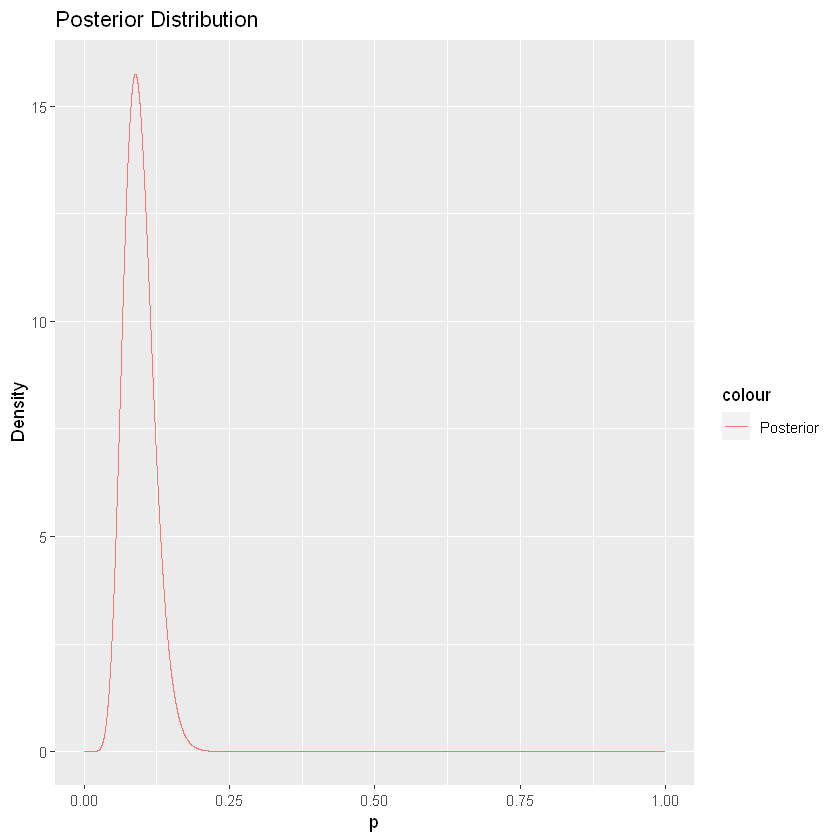

In [8]:
# Parameters
alpha <- 1
beta <- 10
step <- 0.0001
p <- seq(0, 1, by = step)

# Likelihood and prior
like <- dbinom(y, size=n, prob=p)
prior <- dbeta(p, alpha, beta)

# Posterior
post_unorm <- like*prior
post <- post_unorm/(step * sum(post_unorm))

# Plotting posterior distribution
ggplot() +
  geom_line(aes(x=p, y=post, color='Posterior'))+
  labs(x='p', y='Density', title='Posterior Distribution')-> plot_post
plot_post

### c)

Bayesian estimator for p (posterior mean): 0.09448819 
Posterior variance: 0.0006684388 
95% credible interval: 0.05018522 0.1508379 


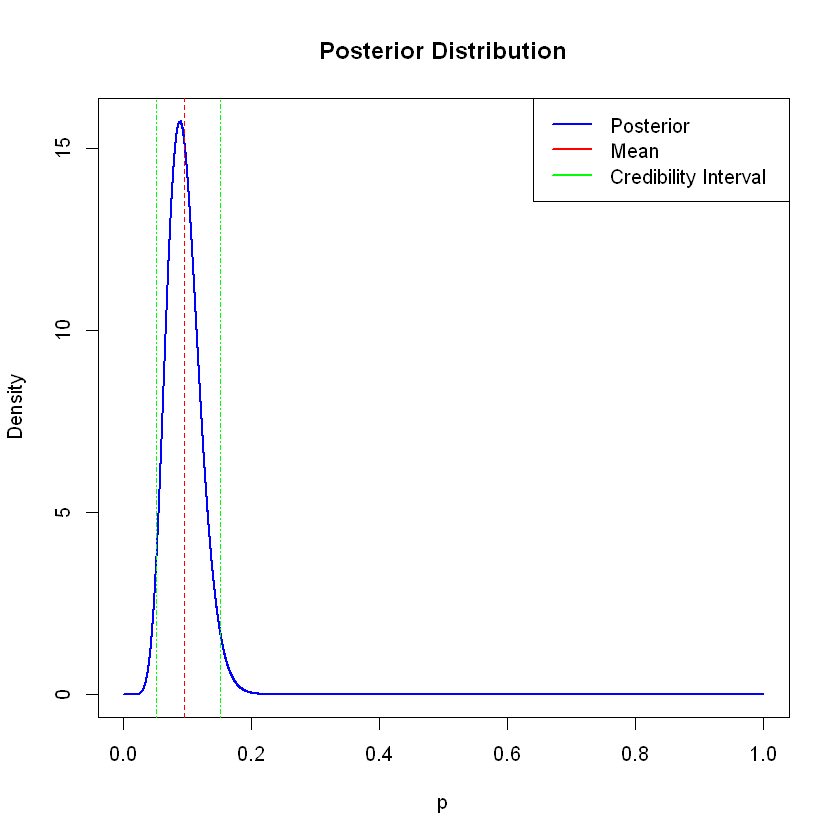

In [13]:
# Posterior parameters
alpha_post <- alpha + y
beta_post <- beta + n - y

# Bayesian estimator for p (posterior mean)
p_bayes <- alpha_post / (alpha_post + beta_post)

# Posterior variance
p_var <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))

# 95% credible interval
p_cred_int <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

# Output results
cat("Bayesian estimator for p (posterior mean):", p_bayes, "\n")
cat("Posterior variance:", p_var, "\n")
cat("95% credible interval:", p_cred_int, "\n")

# Plot the posterior distribution
plot(p, post, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution")
abline(v = p_bayes, lty = 2, col = "red")
abline(v = p_cred_int, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

### d)

Hypothesis test: bayesian approach

Posterior probability of null hypothesis:  61.42 %
Posterior probability of alternative hypothesis:  38.58 %
Cannot reject the null hypothesis.


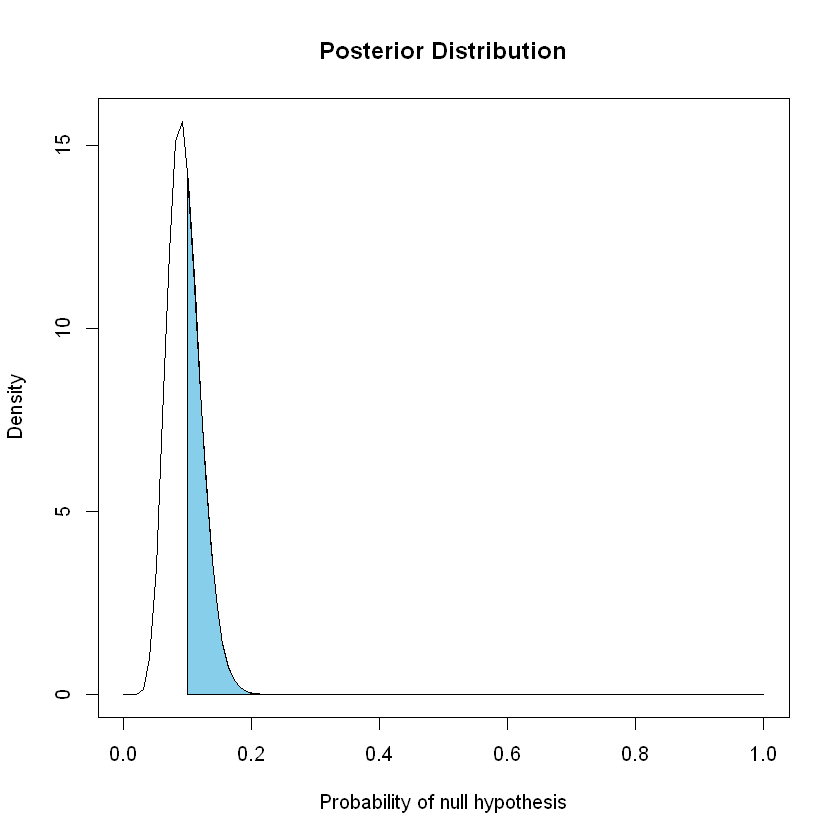

In [17]:
# Probability greater or equal to 10% = NULL hypothesis
null_posterior <- pbeta(0.1, shape1 = alpha_post, shape2 = beta_post)
alt_posterior <- 1 - null_posterior

# print results
cat(paste("Posterior probability of null hypothesis: ", round(null_posterior, 4)*100, "%\n"))
cat(paste("Posterior probability of alternative hypothesis: ", round(alt_posterior, 4)*100, "%\n"))

# Perform the hypothesis test with 5% level of significance
if (null_posterior <= 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Cannot reject the null hypothesis.\n")
}

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, alpha_post, beta_post)
plot(x, posterior, type = "l", main = "Posterior Distribution", xlab = "Probability of null hypothesis", ylab = "Density")

# Shade the critical region
crit_x <- seq(0.1, 1, length.out = 100)
crit_y <- dbeta(crit_x, alpha_post, beta_post)
polygon(c(crit_x, rev(crit_x)), c(rep(0, length(crit_x)), rev(crit_y)), col = "skyblue")

Hypothesis test: frequentist approach

The p-value of the test is 0.5043125 
Cannot reject the null hypothesis.


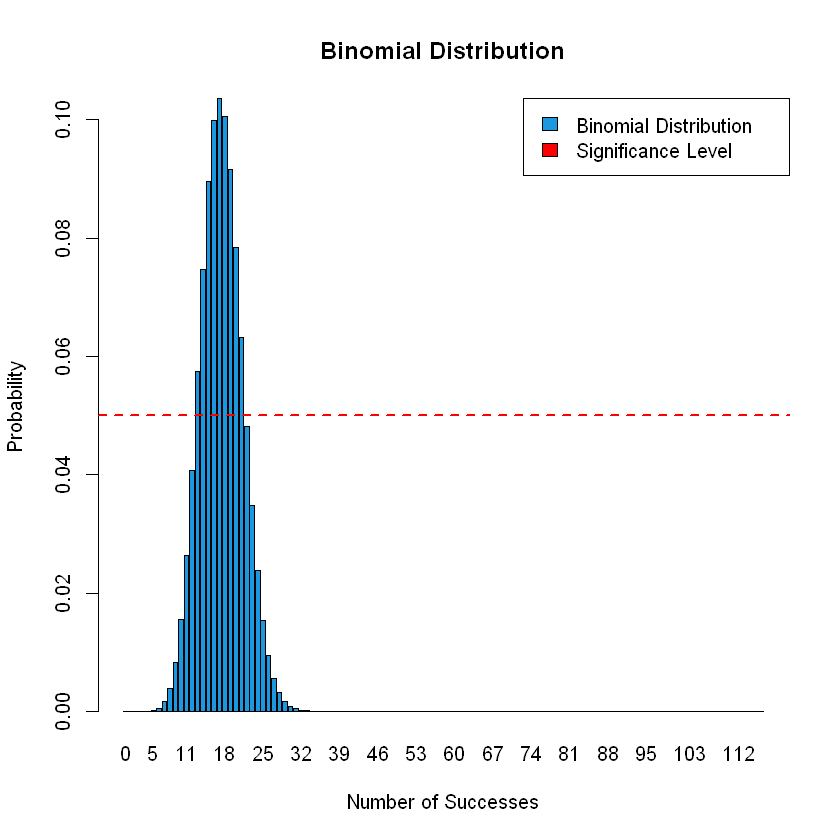

In [19]:
# Perform the binomial test
test_result <- binom.test(y, n, p = 0.1, alternative = "less")

# Report the result of the test
cat("The p-value of the test is", test_result$p.value, "\n")
if (test_result$p.value <= 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Cannot reject the null hypothesis.\n")
}

# Plot the binomial distribution
x <- 0:n
prob <- dbinom(x, n, 0.15)
barplot(prob, names.arg = x, main = "Binomial Distribution", col = "#1b98e0", xlab = "Number of Successes", ylab = "Probability")

# Add a horizontal line representing the significance level
abline(h = 0.05, col = "red", lwd = 2, lty = 'dashed')

legend("topright", legend = c("Binomial Distribution", "Significance Level"),
       fill = c("#1b98e0", "red"), lty = 0)

### e)

In [20]:
n <- 165
y <- 9
# probability (frequentist estimator) 
p <- y/n
cat("The frequentist estimation for p is:", p*100, "%")

The frequentist estimation for p is: 5.454545 %

### f)

In [23]:
install.packages('emdbook')

si installano anche le dipendenze 'bdsmatrix', 'mvtnorm', 'bbmle'




package 'bdsmatrix' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'bbmle' successfully unpacked and MD5 sums checked
package 'emdbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\scumb\AppData\Local\Temp\RtmpgTMQIV\downloaded_packages


For first prior:
Posterior mean: 0.05681818 
Posterior variance: 0.003228306 
95% credible interval: 0.0251 0.0914 
For second prior (old):
Posterior mean: 0.07191781 
Posterior variance: 0.005172171 
95% credible interval: 0.0436 0.1019 


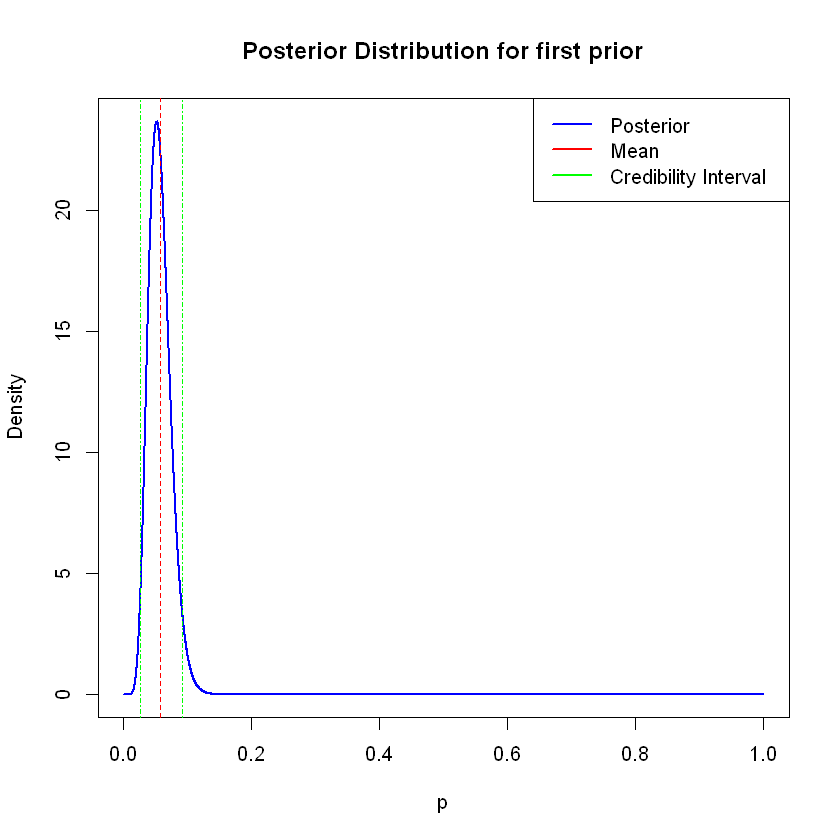

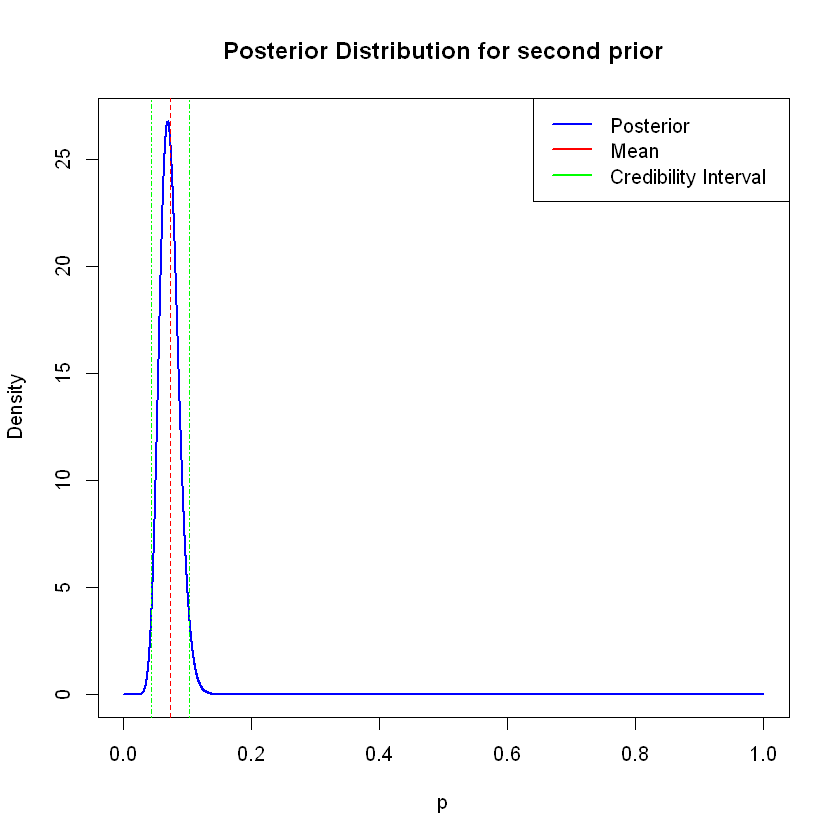

In [26]:
library(emdbook)
# Parameters
alpha <- 1
beta <- 10
step <- 0.0001
p <- seq(0, 1, by = step)

# Likelihood 
like <- dbinom(y, size=n, prob=p)

#Priors
prior <- dbeta(p, alpha, beta)
prior_old <- post

# Posteriors
post_unorm <- like*prior
post_beta <- post_unorm/(step * sum(post_unorm))

post_unorm_old <- like*prior_old
post_old <- post_unorm_old/(step * sum(post_unorm_old))

# Bayesian estimator
mean <- sum(p * post_beta)*step
var <- sum(((mean)^2)*post_beta)*step
cred_int <- ncredint(p, post_beta, level = 0.95)

mean_old <- sum(p * post_old)*step
var_old <- sum(((mean_old)^2)*post_old)*step
cred_int_old <- ncredint(p, post_old, level = 0.95)

# Output results
cat("For first prior:\n")
cat("Posterior mean:", mean, "\n")
cat("Posterior variance:", var, "\n")
cat("95% credible interval:", cred_int,"\n")

cat("For second prior (old):\n")
cat("Posterior mean:", mean_old, "\n")
cat("Posterior variance:", var_old, "\n")
cat("95% credible interval:", cred_int_old,"\n")

# Plot the first prior
plot(p, post_beta, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution for first prior")
abline(v = mean, lty = 2, col = "red")
abline(v = cred_int, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

# Plot the second prior
plot(p, post_old, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution for second prior")
abline(v = mean_old, lty = 2, col = "red")
abline(v = cred_int_old, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)

### g)

Bayesian estimator for p (posterior mean): 0.05681818 
Posterior variance: 0.0003027677 
95% credible interval: 0.02773918 0.09538012 


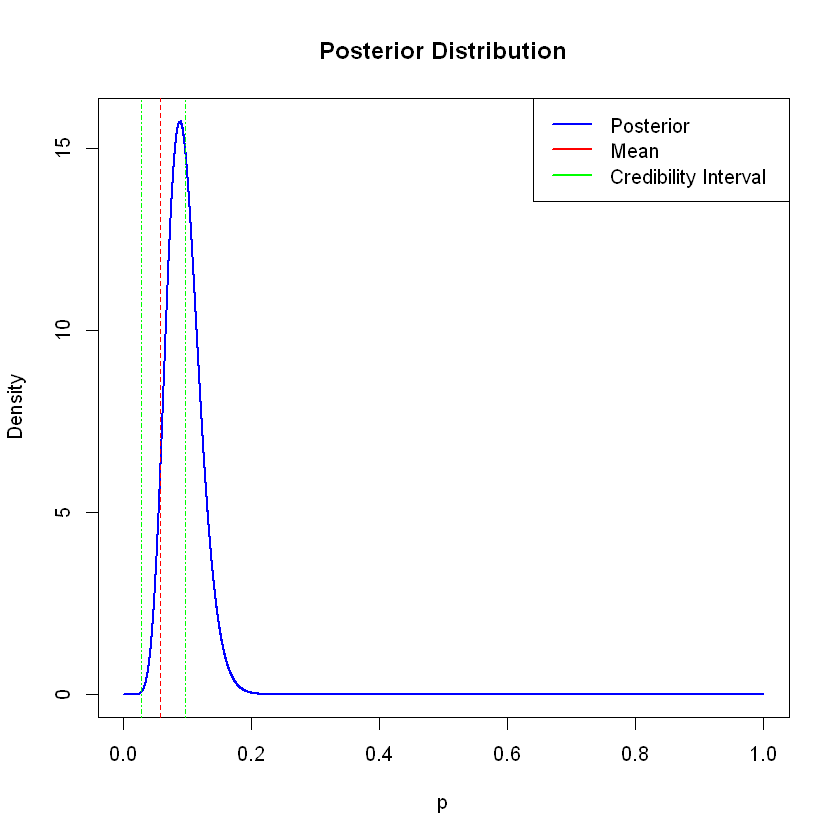

In [27]:
# Posterior parameters
alpha_post <- alpha + y
beta_post <- beta + n - y

# Bayesian estimator for p (posterior mean)
p_bayes <- alpha_post / (alpha_post + beta_post)

# Posterior variance
p_var <- (alpha_post * beta_post) / ((alpha_post + beta_post)^2 * (alpha_post + beta_post + 1))

# 95% credible interval
p_cred_int <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

# Output results
cat("Bayesian estimator for p (posterior mean):", p_bayes, "\n")
cat("Posterior variance:", p_var, "\n")
cat("95% credible interval:", p_cred_int, "\n")

# Plot the posterior distribution
plot(p, post, type = "l", col = "blue", lwd = 2, xlab = "p", ylab = "Density", main = "Posterior Distribution")
abline(v = p_bayes, lty = 2, col = "red")
abline(v = p_cred_int, lty = 4, col = "green")
legend("topright", legend = c("Posterior", "Mean", "Credibility Interval"), col = c("blue", "red", "green"), lwd = 2)